# 사이킷런

### sklearn_linear_model

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
#꽃잎의 길이,넓이
X = iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블: ', np.unique(y))


클래스 레이블:  [0 1 2]


In [3]:
#X와 y배열을 랜덤하게 나눔
#30%는 테스트가됨
#stratify = y : 계층화 기능
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=1, stratify=y)

In [4]:
#bincount : 배열의 고유한 값의 등장 횟수
print('y의 레이블 카운트 : ',np.bincount(y))
print('y_trin의 레이블 카운트 : ',np.bincount(y_train))
print('y_test의 레이블 카운트 : ',np.bincount(y_test))

y의 레이블 카운트 :  [50 50 50]
y_trin의 레이블 카운트 :  [35 35 35]
y_test의 레이블 카운트 :  [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40 , eta0 = 0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1


In [8]:
from sklearn.metrics import accuracy_score
print('정확도 : %.2f' %accuracy_score(y_test,y_pred))

정확도 : 0.98


In [9]:
print('정확도 : %.2f' %ppn.score(X_test_std,y_test))

정확도 : 0.98


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx = None,
                         resolution=0.02):
    
    #마커와 컬러맵을 설정
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정경계
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha =0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y ==cl, 0], y=X[y ==cl, 1],
                   alpha =0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
    #테스트 샘플 부각하여 그리기
    if test_idx:
        X_test, y_test = X[test_idx, : ],y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:,1],
                   facecolors='none', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label = 'test set')
    

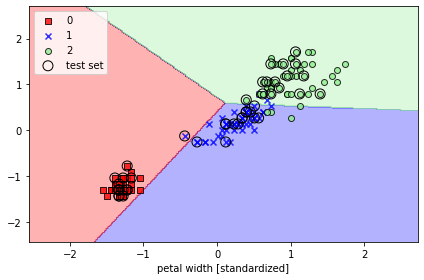

In [11]:
#세 개의 붗꽃 클래스는 선형 결정 경계로 완벽하게 분류되지 못함
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### sklearn_logistic regression

#### 시그모이드
z가 무한대로 커지면 1로, 무한대로 작아지면 0으로 수렴함

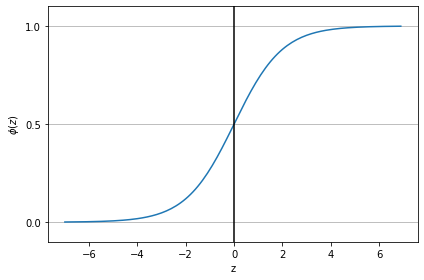

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z =sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
#y축의 눈금과 격자선
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

##### 로지스틱 비용함수의 가중치 학습

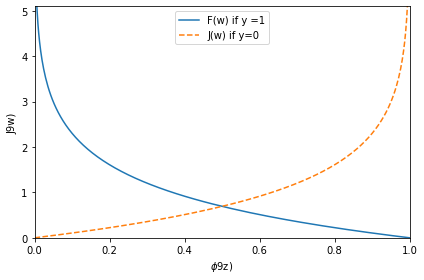

In [13]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z =sigmoid(z)
c1 = [cost_1(x) for x in z ]
plt.plot(phi_z, c1, label='F(w) if y =1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z , c0, linestyle ='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$9z)')
plt.ylabel('J9w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##### 로지스틱 회귀 알고리즘
이진 분류만 가능

In [14]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기
    매개변수
    ------
    eta : float
        학습륙 (0.0과 1.0사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    -----
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 로지스틱 비용 함수 값
    """
    
    def __init__(self, eta =0.05, n_iter=100, random_state =1):
        self.eta = eta
        self.n_iter =n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """훈련 데이터 학슴
        매개변수 
        -----
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타깃 값
            
        반환값
        -----
        self : object

        """
        rgen =np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output= self.activation(net_input)
            errors = (y -output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = (-y.dot(np.log(output)) -
                   ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1./ (1. + np.exp(-np.clip(z, -250,250)))
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환한다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        #다음과 동일
        #return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

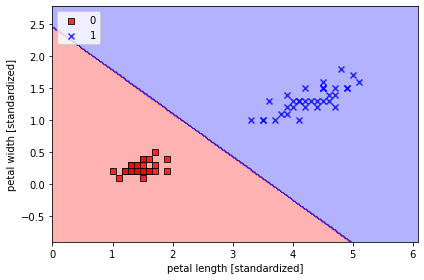

In [15]:
X_train_01_subset=X_train[(y_train ==0) | (y_train ==1)]
y_train_01_subset=y_train[(y_train ==0) | (y_train ==1)]
lrgd = LogisticRegressionGD(eta=0.05,
                           n_iter =1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
        y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()



##### 사이킷런 로지스틱 회귀

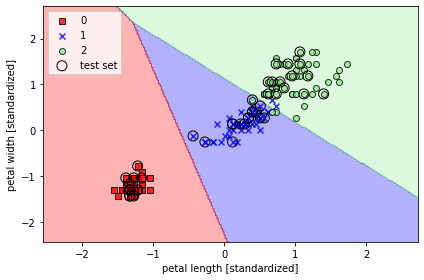

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto',
                       C =100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx =range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()

클래스소속 확률

In [17]:
lr.predict_proba(X_test_std[:3,:])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [18]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [20]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

##### 규제를 사용하여 과대적합 피하기
가정 널리 사용하는 규제 L2규제(가중치 감쇠)

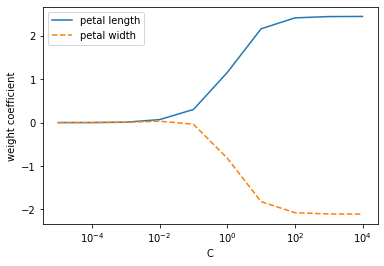

In [21]:
weights, params = [] , []
for c in np.arange(-5,5):
    lr = LogisticRegression(solver= 'liblinear', multi_class='auto', C=10.**c,
                           random_state =1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],
        label ='petal length')
plt.plot(params, weights[:,1], linestyle='--',
        label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')#범례
plt.xscale('log')
plt.show()

### SVM_최대 마진분류
퍼셉트론의 확장(선형)


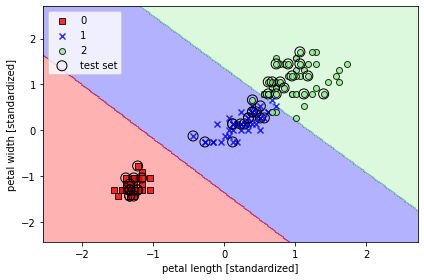

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### 커널 SVM사용하여 비선형 문제 풀기

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

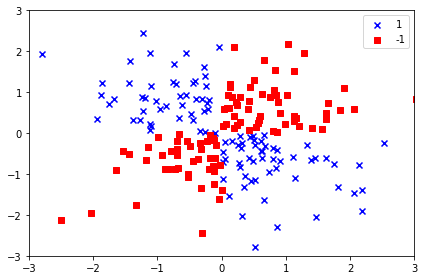

In [24]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor ==1,0],
           X_xor[y_xor ==1,1],
           c='b', marker='x',
           label ='1')
plt.scatter(X_xor[y_xor == -1,0],
           X_xor[y_xor == -1,1],
           c='r',
           marker='s',
           label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

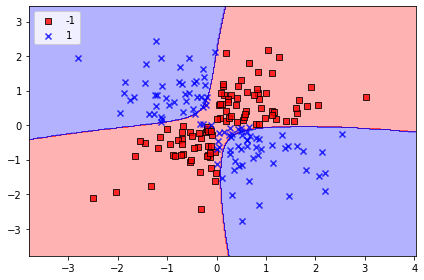

In [25]:
svm = SVC(kernel = 'rbf', C=10.0, random_state=1, gamma=0.10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

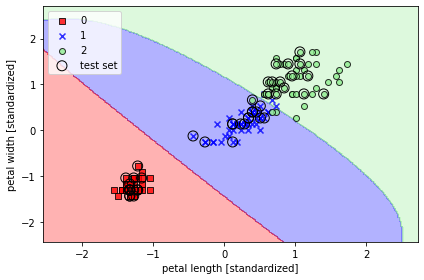

In [26]:
svm = SVC(kernel = 'rbf', C=1.0, random_state=1, gamma=0.2)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

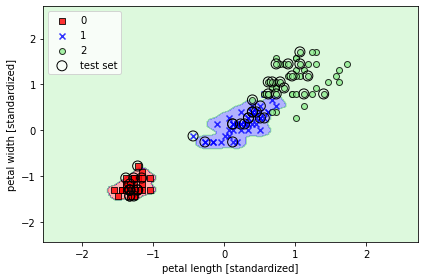

In [27]:
#gamma 조절에 따른 과대적합 조절
#감마가 크면 훈련데이터에서는 잘 맞지만 본적없는 데이엍에서는 오차가 높음
svm = SVC(kernel = 'rbf', C=1.0, random_state=1, gamma=100.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### 결정트리

설명이 중요할 때 유용한 모델, 일련의 질문에 대한 결정을 통해 데이터를 분해

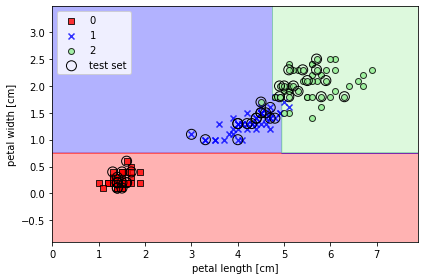

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             random_state =1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier=tree,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

##### 랜덤포레스트

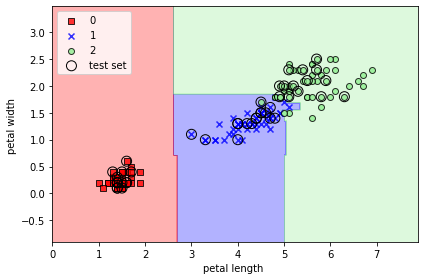

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                               n_estimators =25,
                               random_state =1,
                               n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### k 근접 알고리즘

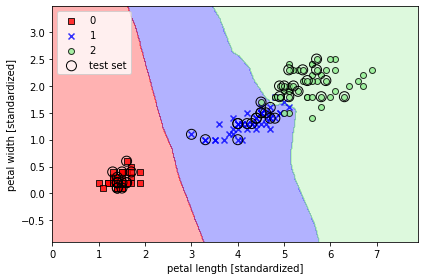

In [32]:
from sklearn.neighbors import KNeighborsClassifier
forest = KNeighborsClassifier(n_neighbors=5,
                               p =2,metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()